<a href="https://colab.research.google.com/github/ah20776/CE888---Assignment/blob/main/Ethnicity%20in%20UK%20Policing/Assignment2/Assignment2_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Data Importing**

In [32]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE888---Assignment.git

fatal: destination path 'CE888---Assignment' already exists and is not an empty directory.


In [33]:
#ESSEX
#using dataset already imported

essex18_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-01-essex-stop-and-search.csv')
essex18_1["Month"] = "January"
essex18_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-02-essex-stop-and-search.csv')
essex18_2["Month"] = "February"
essex18_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-03-essex-stop-and-search.csv')
essex18_3["Month"] = "March"
essex18_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-04-essex-stop-and-search.csv')
essex18_4["Month"] = "April"
essex18_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-05-essex-stop-and-search.csv')
essex18_5["Month"] = "May"
essex18_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-06-essex-stop-and-search.csv')
essex18_6["Month"] = "June"
essex18_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-07-essex-stop-and-search.csv')
essex18_7["Month"] = "July"
essex18_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-08-essex-stop-and-search.csv')
essex18_8["Month"] = "August"
essex18_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-09-essex-stop-and-search.csv')
essex18_9["Month"] = "September"
essex18_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-10-essex-stop-and-search.csv')
essex18_10["Month"] = "October"
essex18_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-11-essex-stop-and-search.csv')
essex18_11["Month"] = "November"
essex18_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-12-essex-stop-and-search.csv')
essex18_12["Month"] = "December"
essex19_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-01-essex-stop-and-search.csv')
essex19_1["Month"] = "January"
essex19_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-02-essex-stop-and-search.csv')
essex19_2["Month"] = "February"
essex19_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-03-essex-stop-and-search.csv')
essex19_3["Month"] = "March"
essex19_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-04-essex-stop-and-search.csv')
essex19_4["Month"] = "April"
essex19_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-05-essex-stop-and-search.csv')
essex19_5["Month"] = "May"
essex19_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-06-essex-stop-and-search.csv')
essex19_6["Month"] = "June"
essex19_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-07-essex-stop-and-search.csv')
essex19_7["Month"] = "July"
essex19_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-08-essex-stop-and-search.csv')
essex19_8["Month"] = "August"
essex19_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-09-essex-stop-and-search.csv')
essex19_9["Month"] = "September"
essex19_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-10-essex-stop-and-search.csv')
essex19_10["Month"] = "October"
essex19_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-11-essex-stop-and-search.csv')
essex19_11["Month"] = "November"
essex19_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-12-essex-stop-and-search.csv')
essex19_12["Month"] = "December"
essex20_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-01-essex-stop-and-search.csv')
essex20_1["Month"] = "January"
essex20_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-02-essex-stop-and-search.csv')
essex20_2["Month"] = "February"
essex20_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-03-essex-stop-and-search.csv')
essex20_3["Month"] = "March"
essex20_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-04-essex-stop-and-search.csv')
essex20_4["Month"] = "April"
essex20_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-05-essex-stop-and-search.csv')
essex20_5["Month"] = "May"
essex20_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-06-essex-stop-and-search.csv')
essex20_6["Month"] = "June"
essex20_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-07-essex-stop-and-search.csv')
essex20_7["Month"] = "July"
essex20_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-08-essex-stop-and-search.csv')
essex20_8["Month"] = "August"
essex20_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-09-essex-stop-and-search.csv')
essex20_9["Month"] = "September"
essex20_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-10-essex-stop-and-search.csv')
essex20_10["Month"] = "October"
essex20_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-11-essex-stop-and-search.csv')
essex20_11["Month"] = "November"
essex20_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-12-essex-stop-and-search.csv')
essex20_12["Month"] = "December"
essex18 = pd.concat([essex18_1,essex18_2,essex18_3,essex18_4,essex18_5,essex18_6,essex18_7,essex18_8,essex18_9,essex18_10,essex18_11,essex18_12])
essex18["Year"] = 2018
essex19 = pd.concat([essex19_1,essex19_2,essex19_3,essex19_4,essex19_5,essex19_6,essex19_7,essex19_8,essex19_9,essex19_10,essex19_11,essex19_12])
essex19["Year"] = 2019
essex20 = pd.concat([essex20_1,essex20_2,essex20_3,essex20_4,essex20_5,essex20_6,essex20_7,essex20_8,essex20_9,essex20_10,essex20_11,essex20_12])
essex20["Year"] = 2020
essex = pd.concat([essex18,essex19,essex20])
essex["City"] = "Essex"
essex= pd.DataFrame(essex)
essex.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Month,Year,City
0,Person search,2018-01-01T00:01:00+00:00,False,NaN,51.544045,0.693247,Male,25-34,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action,False,False,January,2018,Essex
1,Person search,2018-01-01T02:01:00+00:00,False,NaN,51.739265,0.679219,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,False,False,January,2018,Essex
2,Person search,2018-01-01T18:01:00+00:00,False,NaN,51.571156,0.485254,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,False,January,2018,Essex
3,Person search,2018-01-01T18:01:00+00:00,False,NaN,51.571156,0.485254,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,False,January,2018,Essex
4,Vehicle search,2018-01-01T18:01:00+00:00,False,NaN,51.571369,0.486247,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,NaN,January,2018,Essex


**Data Cleaning and Data Wrangling**

In [34]:
essex.columns = essex.columns.str.lower().str.replace(' ', '_')

In [35]:
essex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43767 entries, 0 to 421
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   type                                      43767 non-null  object 
 1   date                                      43767 non-null  object 
 2   part_of_a_policing_operation              43767 non-null  bool   
 3   policing_operation                        0 non-null      float64
 4   latitude                                  42992 non-null  float64
 5   longitude                                 42992 non-null  float64
 6   gender                                    41290 non-null  object 
 7   age_range                                 40262 non-null  object 
 8   self-defined_ethnicity                    41315 non-null  object 
 9   officer-defined_ethnicity                 40893 non-null  object 
 10  legislation                         

In [36]:
essex.shape

(43767, 18)

In [37]:
#Getting subset
sort = essex[['type','date','gender','age_range','officer-defined_ethnicity','legislation','object_of_search','outcome']]
data = sort.dropna()
data = data.reset_index(drop=True)
data.describe()

,type,date,gender,age_range,officer-defined_ethnicity,legislation,object_of_search,outcome
count,39415,39415,39415,39415,39415,39415,39415,39415
unique,2,12728,2,5,4,8,8,15
top,Person search,2019-09-17T08:01:00+00:00,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal
freq,28977,65,34857,14873,32172,26637,26726,28298


In [40]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date

In [42]:
data.rename({'officer-defined_ethnicity':'ethnicity'}, axis=1, inplace=True)
data.head()

,type,date,gender,age_range,ethnicity,legislation,object_of_search,outcome
0,Person search,2018-01-01,Male,25-34,Black,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action
1,Person search,2018-01-01,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action
2,Person search,2018-01-01,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action
3,Person search,2018-01-01,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action
4,Person search,2018-01-01,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action


**Data Analysis**

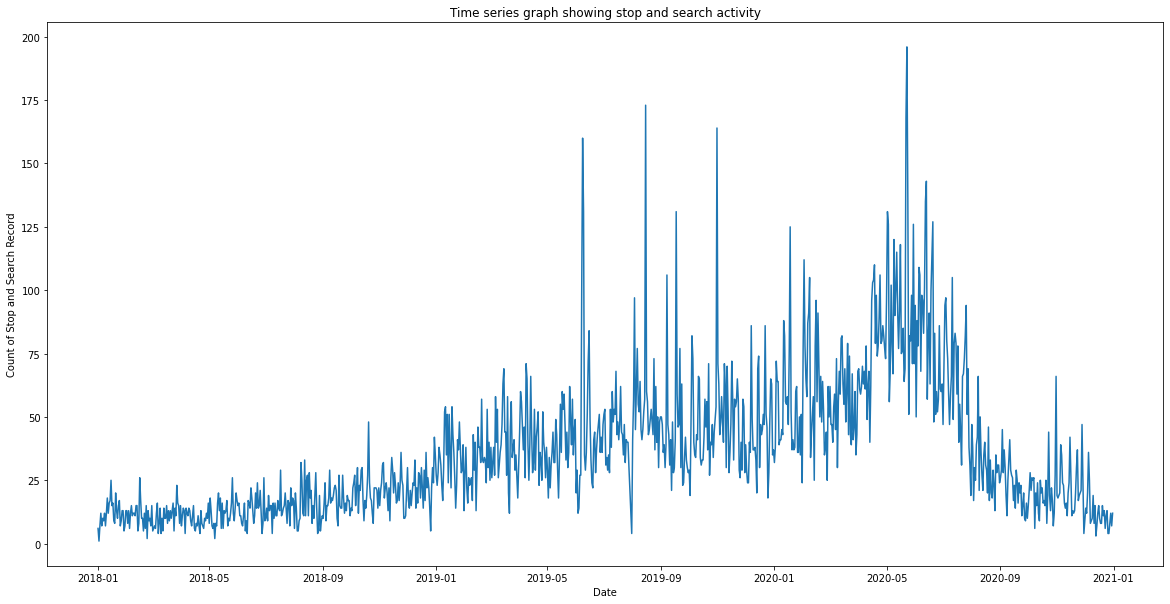

In [46]:
count_by_date = data.groupby('date').size()

plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Count of Stop and Search Record')
plt.title('Time series graph showing stop and search activity')
plt.plot(count_by_date);

In [47]:
data['ethnicity'].value_counts()

White    32172
Black     4059
Asian     1689
Other     1495
Name: ethnicity, dtype: int64

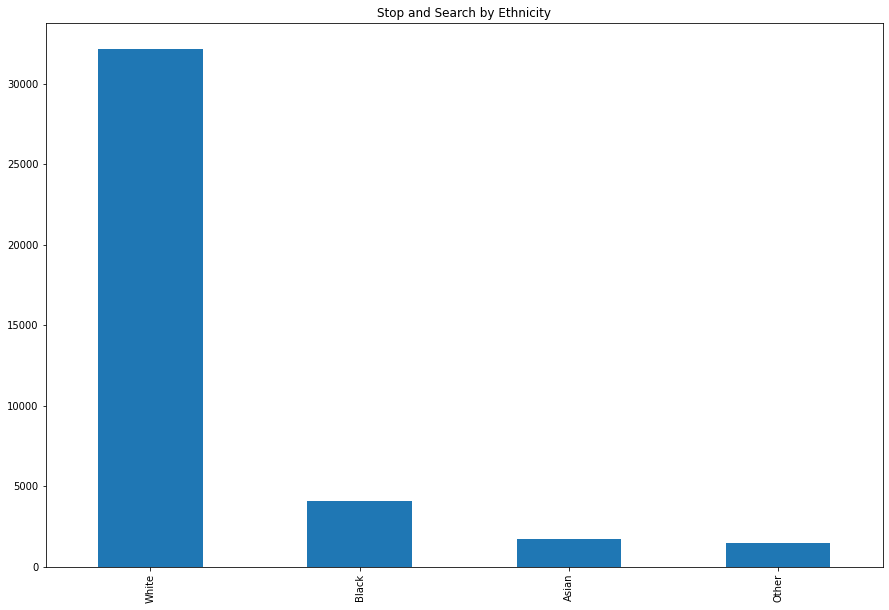

In [50]:
data['ethnicity'].value_counts().plot.bar(title='Stop and Search by Ethnicity',figsize=(15,10));

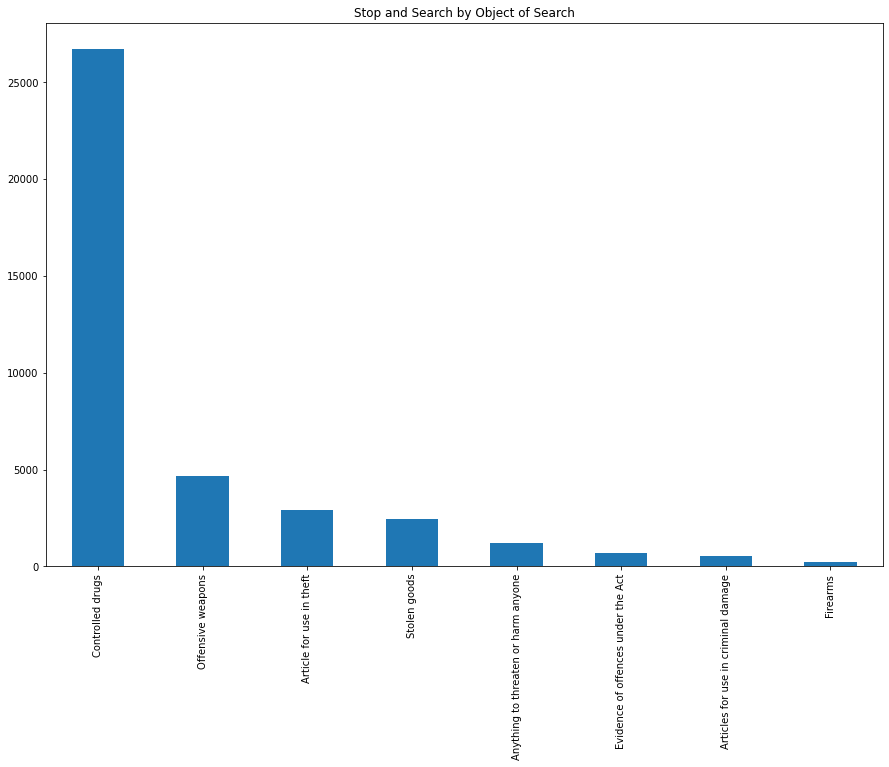

In [51]:
data['object_of_search'].value_counts().plot.bar(title='Stop and Search by Object of Search',figsize=(15,10));

So the most common thing is for a white person to get stopped under the objection of police finding controlled drugs.

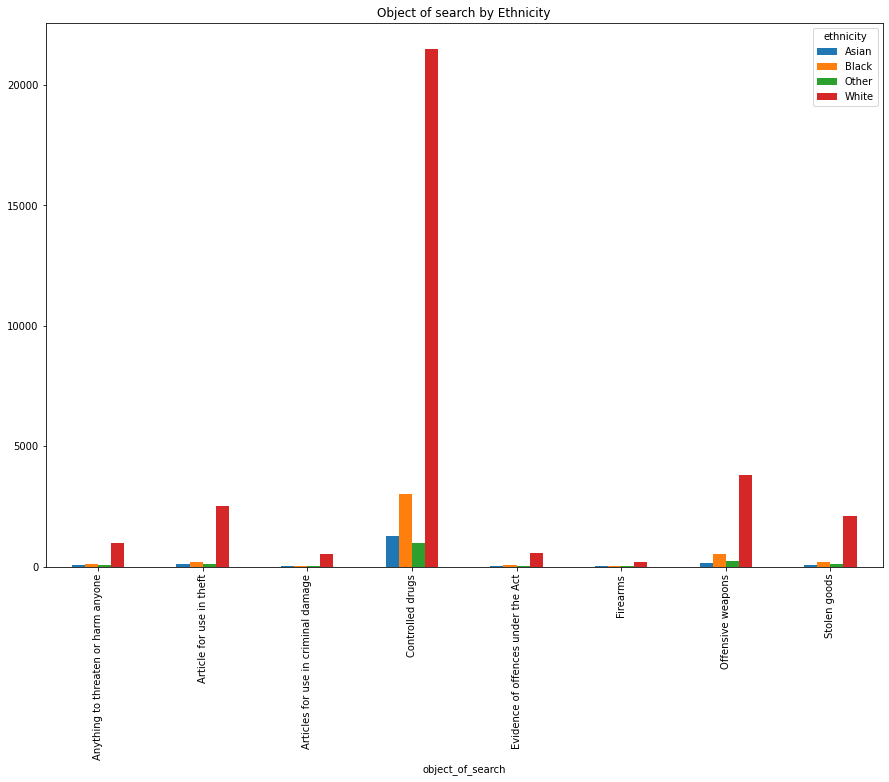

In [52]:
data.groupby('ethnicity')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

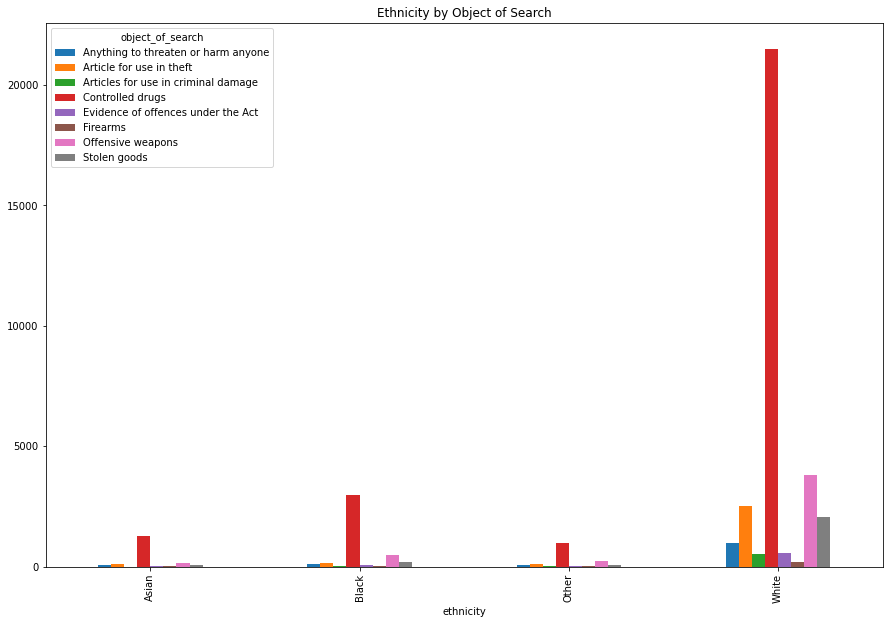

In [53]:
data.groupby('object_of_search')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Object of Search', figsize=(15,10));

This shows us that Controlled Drugs is the most common thing to get stopped for all ethnicities. With Offensive Weapons coming in second. We can also see that White people are ahead for the two main crimes here.

Let's remove all but the top two and do some analysis.

In [59]:
counts = data['object_of_search'].value_counts()
counts
counts[counts > 4000]

Controlled drugs     26726
Offensive weapons     4690
Name: object_of_search, dtype: int64

In [60]:
drugs = data.object_of_search == 'Controlled drugs'
weapons = data.object_of_search == 'Offensive weapons'

In [65]:
drugs_p_weapons = data.object_of_search[weapons].count() + data.object_of_search[weapons].count()

In [66]:
drugs_prc = data.object_of_search[drugs].count() / drugs_p_weapons
weapons_prc = data.object_of_search[weapons].count() / drugs_p_weapons

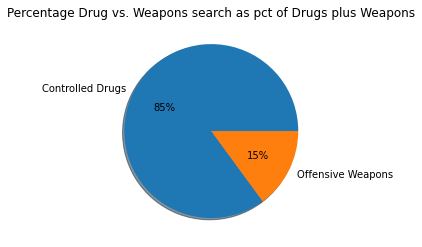

In [67]:
# this will plot a pie chart for us
labels = 'Controlled Drugs', 'Offensive Weapons'
fracs = [drugs_prc, weapons_prc]
explode = (0,0)
plt.axis("equal")
plt.title('Percentage Drug vs. Weapons search as pct of Drugs plus Weapons')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

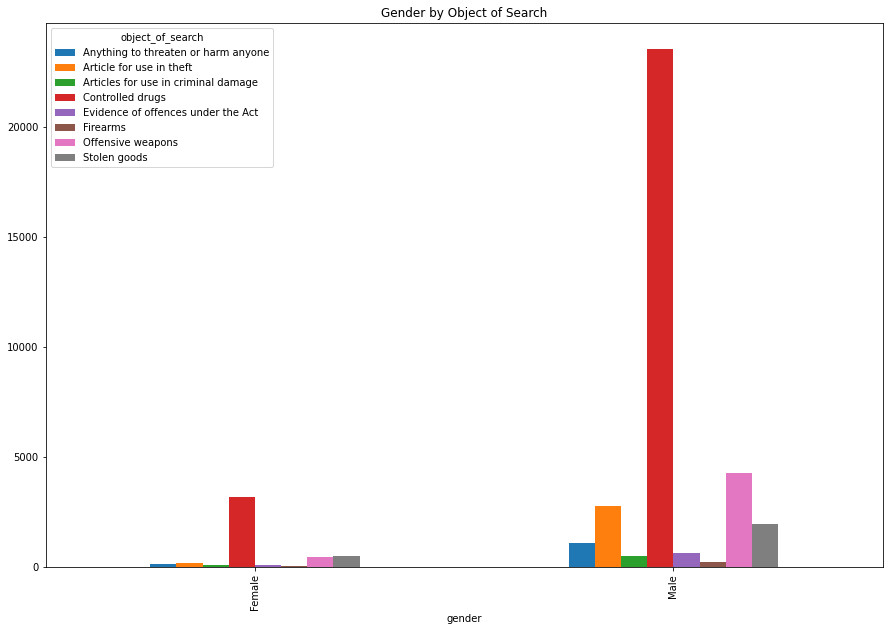

In [70]:
data.groupby('object_of_search')['gender'].value_counts().unstack(0).plot.bar(title='Gender by Object of Search', figsize=(15,10));

Well males are the overwhelming majority here but the trend still continues for the controlled drug searches. To show how much a majority of males there is lets make a pie chart.

In [73]:
gender_male = data.gender == 'Male'
gender_female = data.gender == 'Female'

In [75]:
gender_male_prc = data.gender[gender_male].count() / len(data)
gender_female_prc = data.gender[gender_female].count() / len(data)

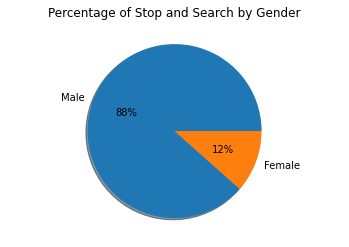

In [77]:
labels = 'Male', 'Female'
fracs = [gender_male_prc, gender_female_prc]
explode = (0.0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Gender')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

In [79]:
age_u10 = data.age_range == 'under 10'
age_10 = data.age_range == '10-17'
age_18 = data.age_range == '18-24'
age_25 = data.age_range == '25-34'
age_34 = data.age_range == 'over 34'

In [80]:
age_u10_prc = data.age_range[age_u10].count() / len(data)
age_10_prc = data.age_range[age_10].count() / len(data)
age_18_prc = data.age_range[age_18].count() / len(data)
age_25_prc = data.age_range[age_25].count() / len(data)
age_34_prc = data.age_range[age_34].count() / len(data)

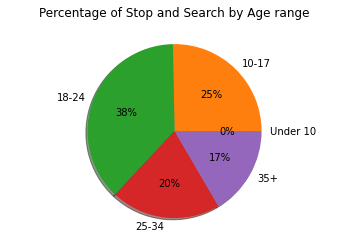

In [81]:
labels = 'Under 10', '10-17', '18-24', '25-34', '35+'
fracs = [age_u10_prc, age_10_prc, age_18_prc, age_25_prc, age_34_prc]
explode = (0,0,0,0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Age range')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

This is more interesting - 25% of the dataset is from 10 to 17. This is very young! Overall the 10-17 and 18-24 groups make up 63%! This really shows who police are viewing as committing the crimes and not who is committing crimes, but it is a interesting insight.

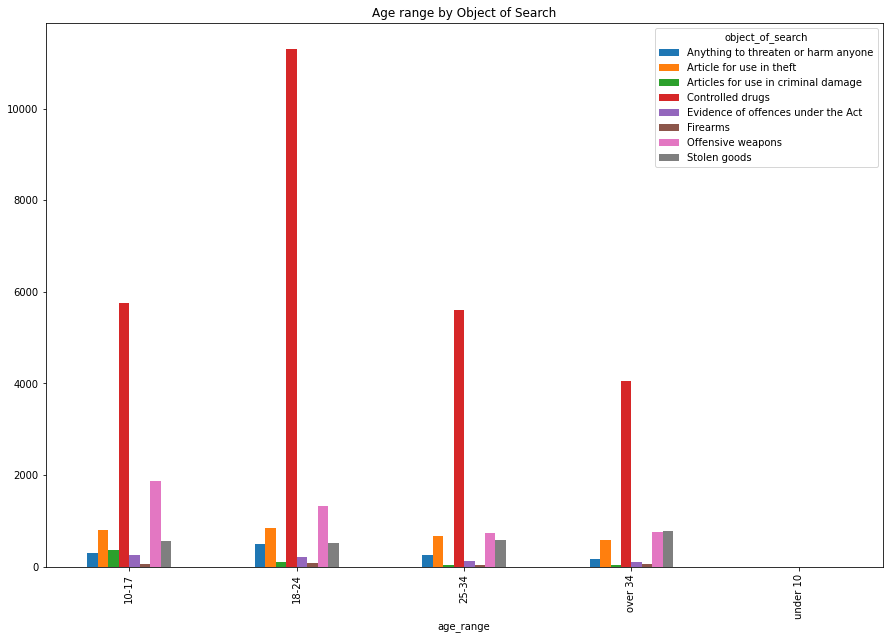

In [82]:
data.groupby('object_of_search')['age_range'].value_counts().unstack(0).plot.bar(title='Age range by Object of Search', figsize=(15,10));

We can see that 10-17 year olds are ahead for having offensive weapons here. We can also see just how overwhelmingly 18-24 year olds are getting stopped for drug related crimes.

Finally lets look at some time series graph to see if any trends have increased or decreased over the time series.

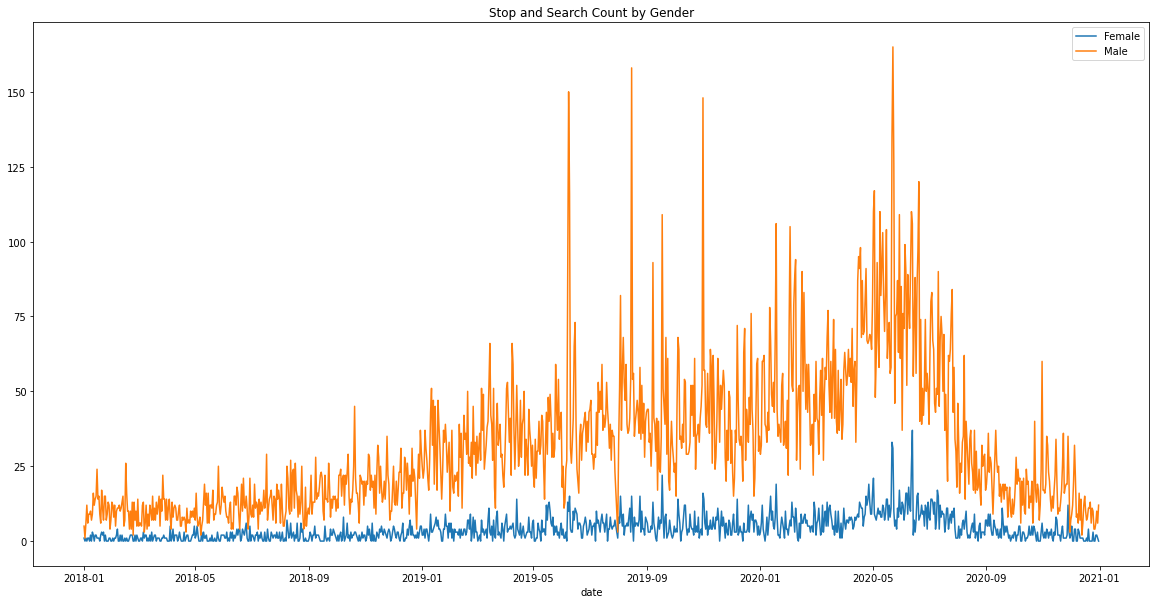

In [83]:
gender_count = data.groupby('date')
gender_count = gender_count.gender.apply(pd.value_counts).unstack(-1).fillna(0)


gender_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Gender');

Slight downward trend in males and females looks to stay steady. It looks like there are some seasonal shifts in the data - especially obvious from August 2020.

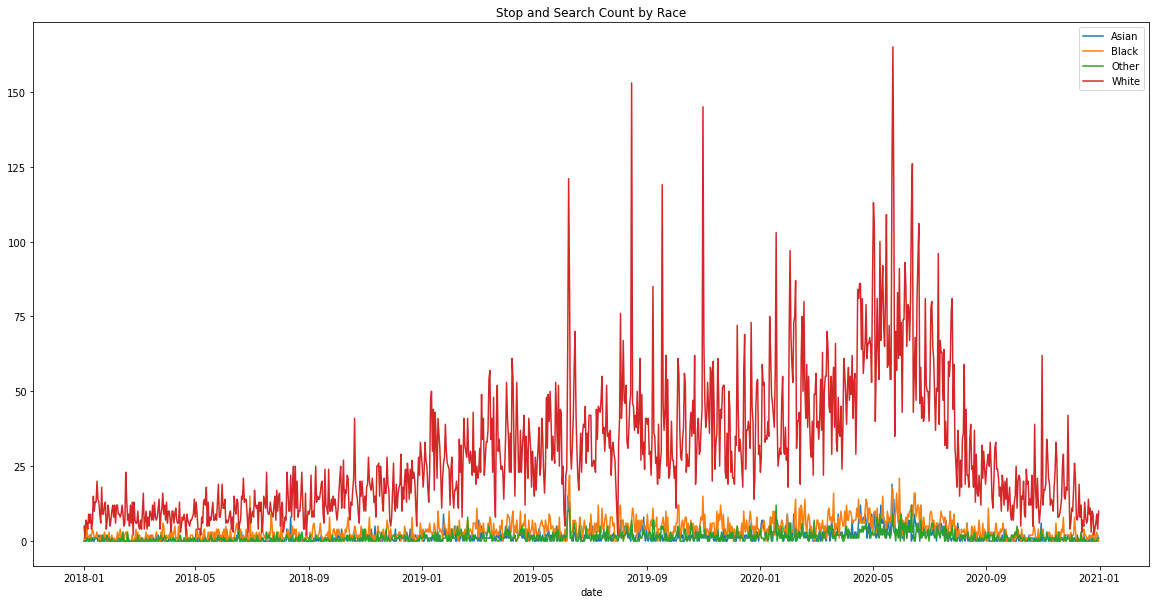

In [84]:
race_count = data.groupby('date')
race_count = race_count.ethnicity.apply(pd.value_counts).unstack(-1).fillna(0)

race_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Race');

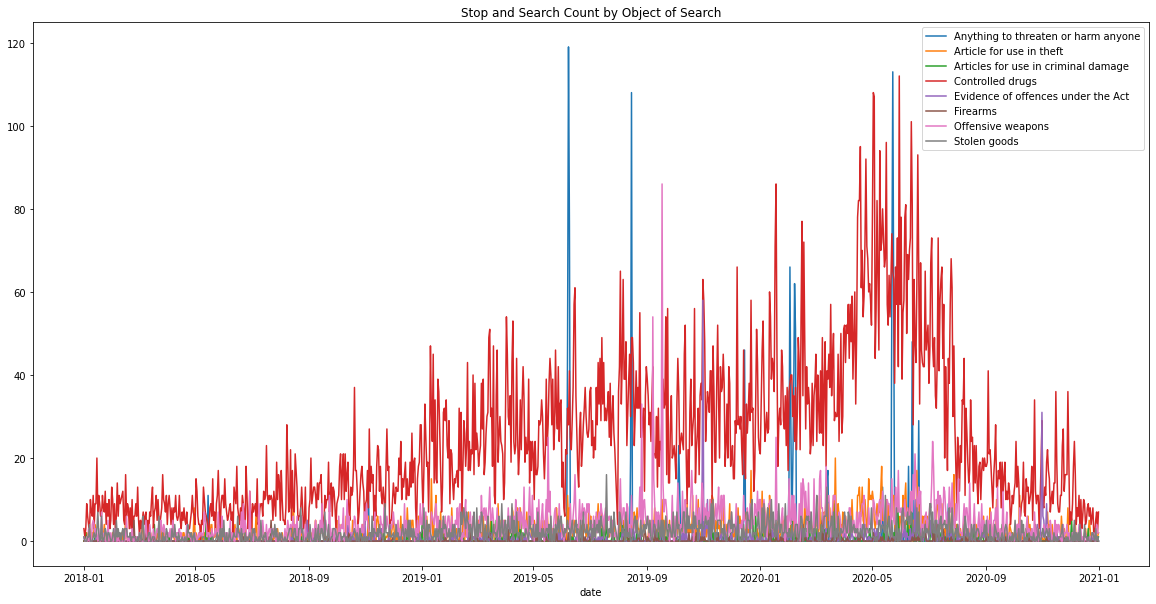

In [85]:
object_count = data.groupby('date')
object_count = object_count.object_of_search.apply(pd.value_counts).unstack(-1).fillna(0)

object_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Object of Search');

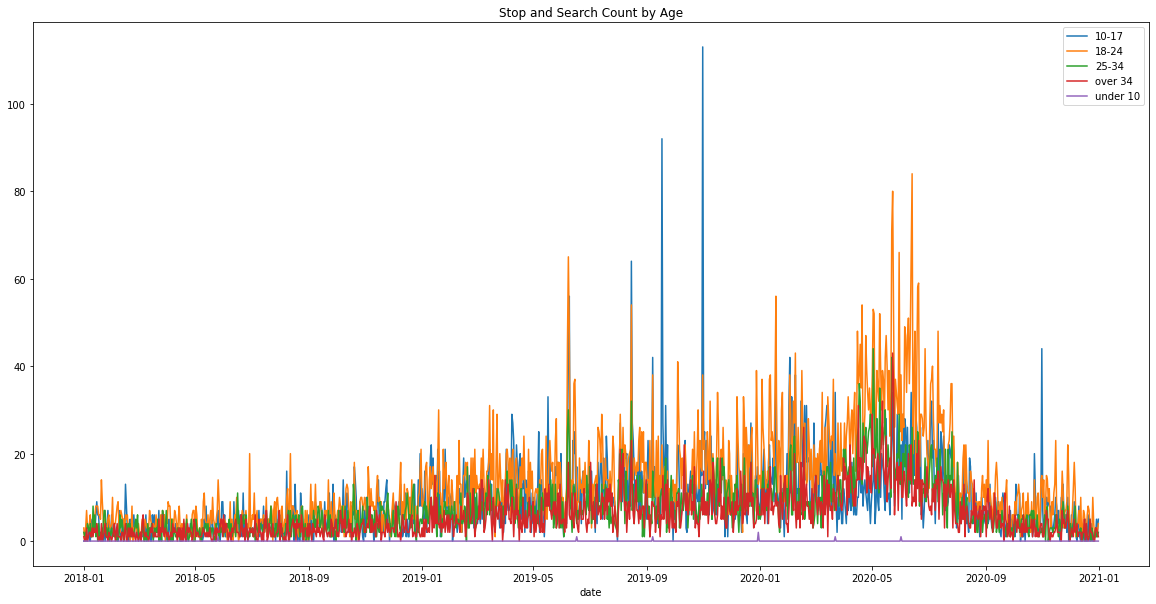

In [86]:
age_count = data.groupby('date')
age_count = age_count.age_range.apply(pd.value_counts).unstack(-1).fillna(0)
age_count.plot(kind='line', figsize=(20,10), title='Stop and Search Count by Age');

We can see the two main reasons for stopping someone is for either suspected possesion of a controlled substance, drugs; or offensive weapons. These trends are the same throuhgout Race, Age and Gender.